<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/K_mean_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np      #To Prform Numerical Operation
import matplotlib.pyplot as plt   #plot something 
import pandas as pd     #To Play With Dataset

In [ ]:
from google.colab import drive  #import gogle drive data

In [ ]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [ ]:
df1 = pd.read_excel("kmean.xlsx",sheet_name='ex7data2_X',header=None)
df1.head()
# dataset=pd.read_csv("kmean.xlsx")
# print(dataset)
# dataset.shape

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
X = np.array(df1)
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [ ]:
import random

In [ ]:
init_centroids = random.sample(range(0,len(df1)),4)
init_centroids    # index position of dataset

[272, 298, 201, 202]

In [ ]:
centroids=[]
for i in init_centroids:
    centroids.append(df1.iloc[i])

In [ ]:
centroids

[0    6.885756
 1    2.888453
 Name: 272, dtype: float64, 0    6.117681
 1    2.854757
 Name: 298, dtype: float64, 0    6.056964
 1    2.949704
 Name: 201, dtype: float64, 0    6.770128
 1    3.214114
 Name: 202, dtype: float64]

In [ ]:
centroids = np.array(centroids)
centroids

array([[6.88575584, 2.88845269],
       [6.11768055, 2.85475655],
       [6.05696411, 2.94970433],
       [6.77012767, 3.21411422]])

In [ ]:
#Euclidean Distance
def cal_distance(x1,x2):
    return (sum((x1-x2)**2))**0.5

In [ ]:
def findClosestCentroid(c,x):
    assign_centroid=[]
    for i in x:
        distance=[]
        for j in c:
            distance.append(cal_distance(i,j))
        assign_centroid.append(np.argmin(distance))
    return assign_centroid


In [ ]:
get_centroid=findClosestCentroid(centroids,X)

In [ ]:
def cal_centroids(cluster,x):
    new_centroid=[]
    new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
    for c in set(new_df1['cluster']):             #return unique value
        current_cluster = new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]      #considering all X and Y values for particular cluster 'C'
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)

    return new_centroid

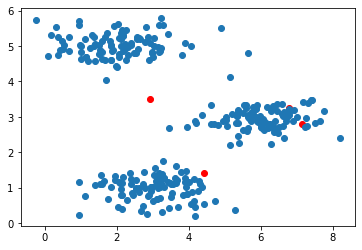

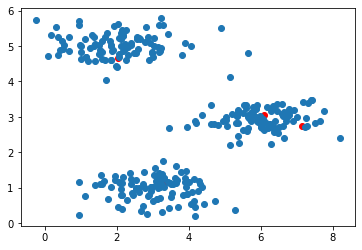

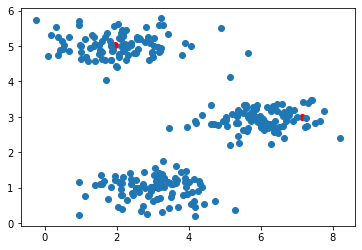

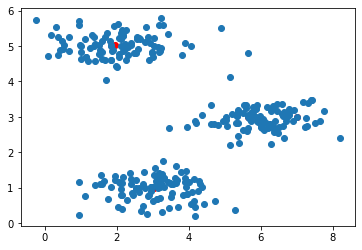

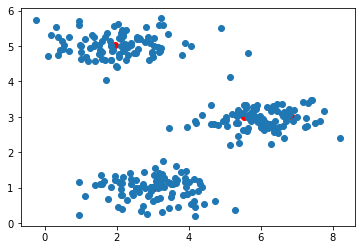

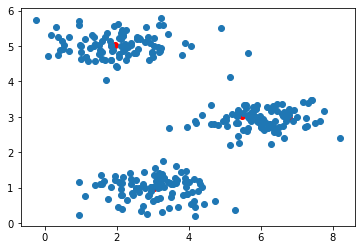

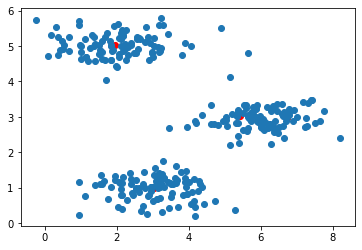

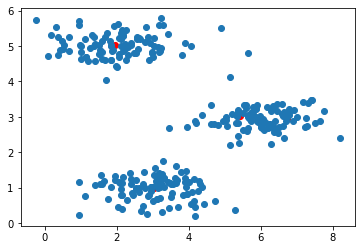

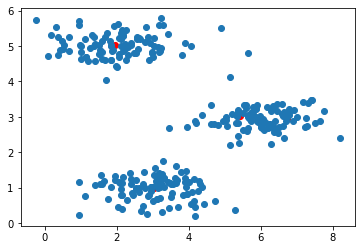

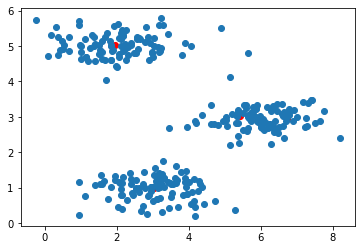

In [ ]:
for i in range(10):
    get_centroid = findClosestCentroid(centroids,X)   #obtain cluster number for each data points
    centroids = cal_centroids(get_centroid,X)

    # plotting
    plt.figure()
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1], color="red")
    plt.scatter(X[:,0],X[:,1],alpha=1)
    plt.show()


In [ ]:
#compression or dimension reduction on Image
import cv2 
im = cv2.imread('Tom_Image.jpg')
im.shape

(200, 200, 3)

In [ ]:
im = (im/255).reshape(200*200,3)

In [ ]:
init_centroids = random.sample(range(0,len(im)),10)
init_centroids

[22948, 33048, 16048, 18698, 39442, 4021, 16731, 7783, 4073, 11805]

In [ ]:
centroids=[]
for i in init_centroids:
    centroids.append(im[i]) 

In [ ]:
centroids=np.array(centroids)

In [ ]:
# for i in range(15):
#     print(i)
#     get_centroid = findClosestCentroid(centroids,im)   #obtain cluster number for each data points
#     centroids = cal_centroids(get_centroid,im)


In [ ]:
# import matplotlib.image as mpimg
# fig,ax = plt.subplot(1,4)
# ax[0].imshow(im1)